# Breast Cancer Detection

#### Import Libraries & Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data.csv")
df = data.copy()

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [5]:
df.shape

(569, 33)

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

__There are null values in column "Unnamed: 32"__

In [10]:
df.duplicated().sum()

0

__There are NO duplicated values__

### Data Preprocessing

In [11]:
# drop "Unnamed: 32" column
df.drop(columns = ["Unnamed: 32"] , inplace = True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# split data
x = df.iloc[:,2:]
y= df.iloc[:,1]

In [13]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

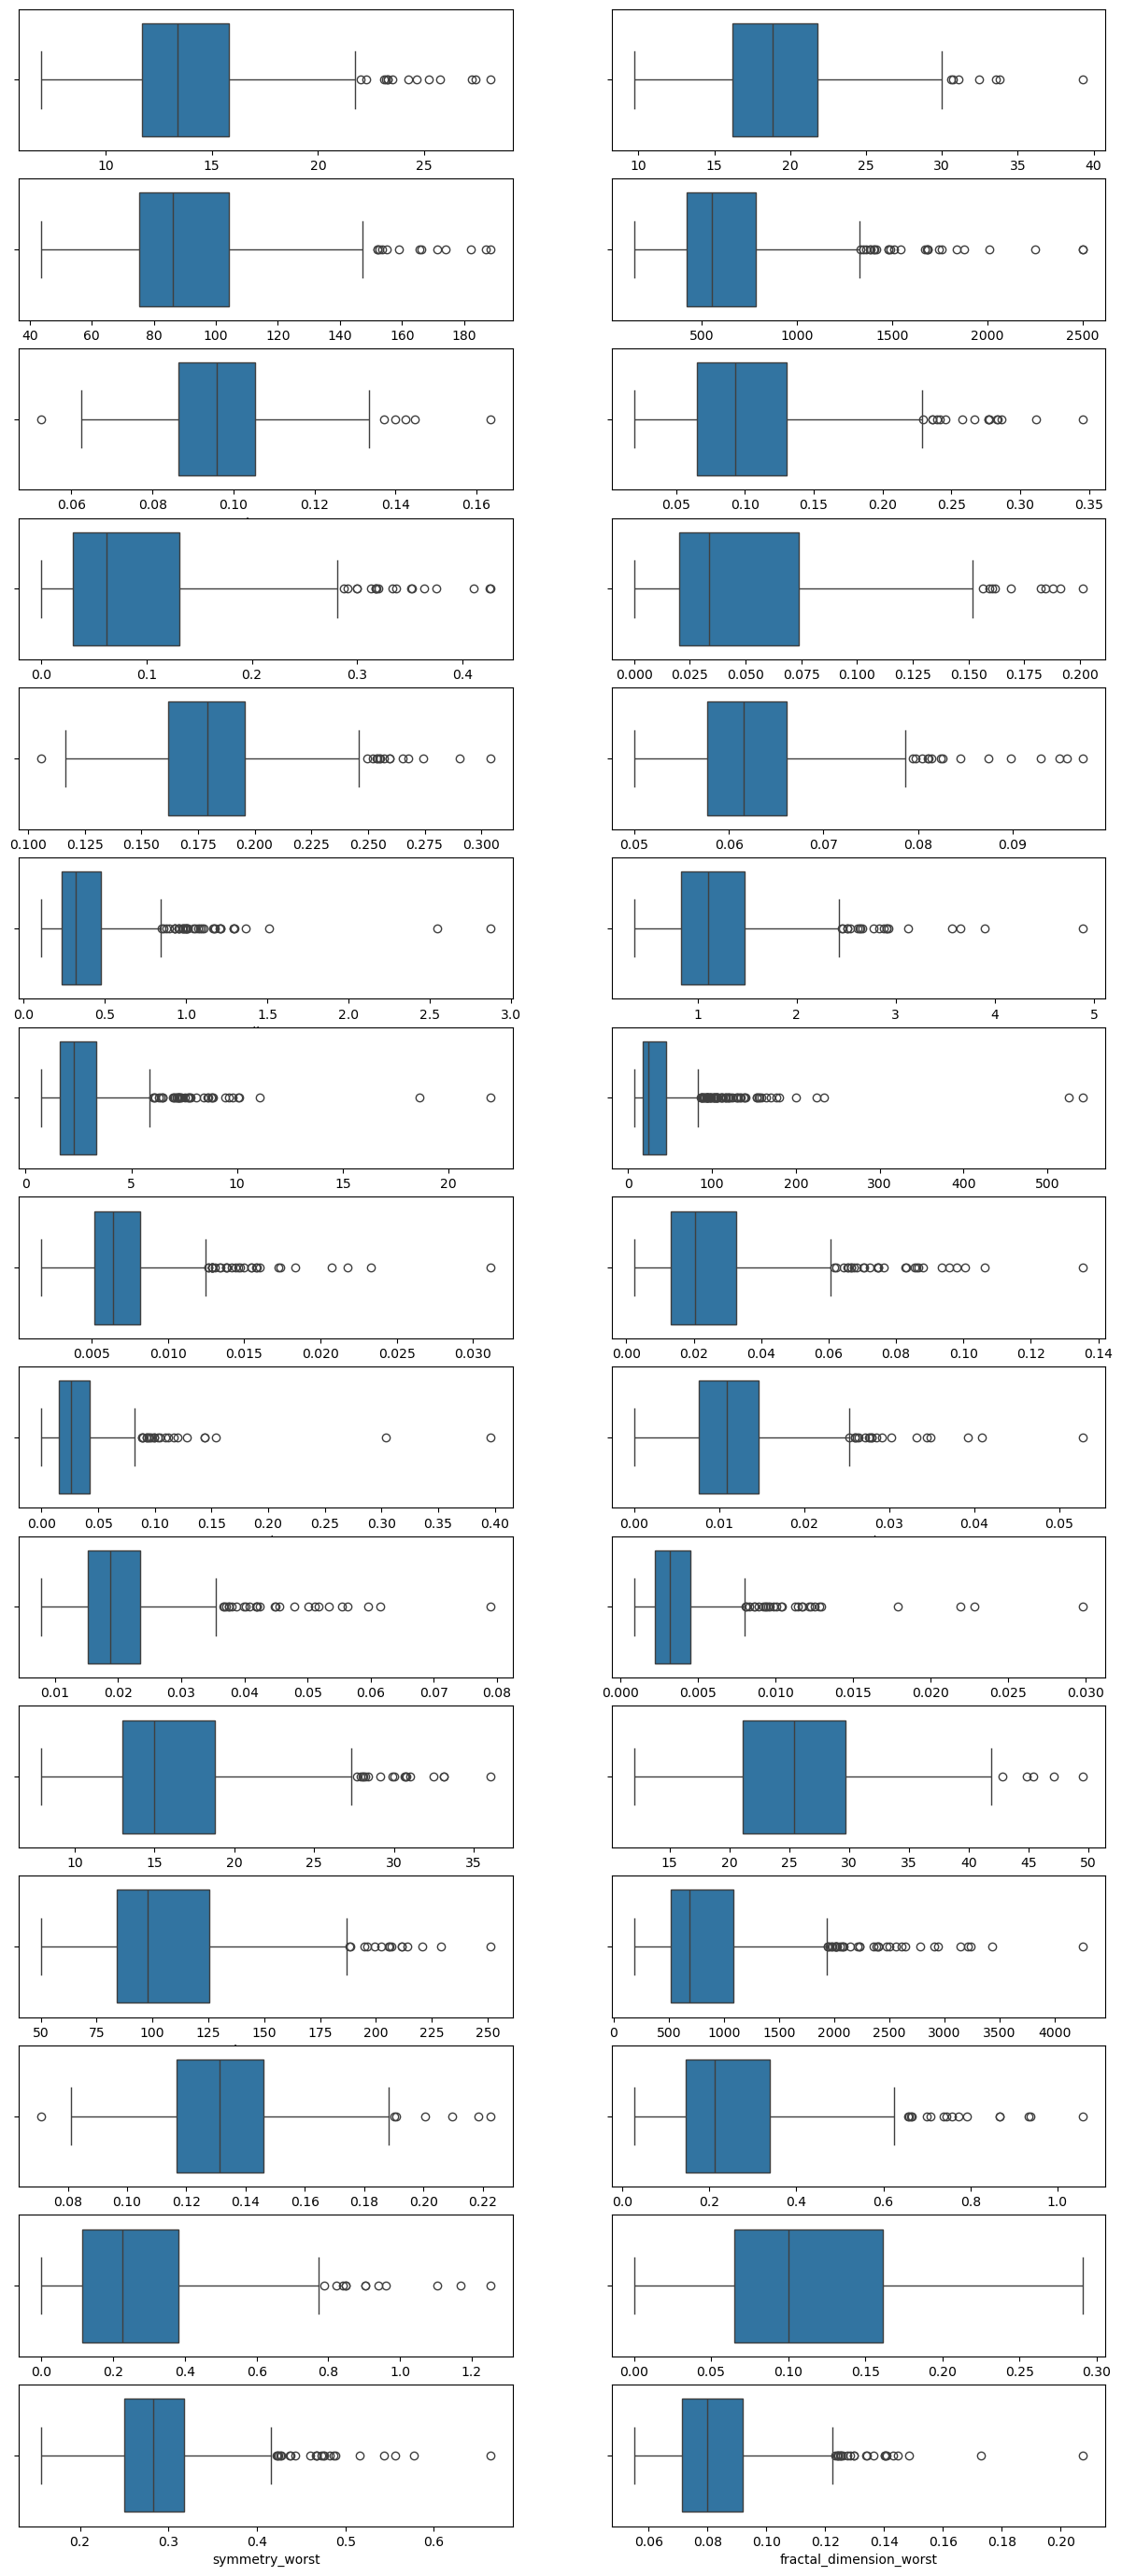

In [15]:
# check for outlaiers
fig, axes = plt.subplots(nrows=15, ncols=2, figsize=(15, 35))  
    
for i, col in enumerate(x.columns):
    ax = axes[i // 2, i % 2]  
    sns.boxplot(data=x.iloc[:,:], x=col, ax=ax)

__There are outliers__

In [17]:
# Handle outliers
def handle_outliers (df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3-Q1

        upper_limit = Q3 + IQR*1.5
        lower_limit = Q1 - IQR*1.5

        df[col] = np.where (df[col] < lower_limit , lower_limit , df[col])
        df[col] = np.where (df[col] > upper_limit , upper_limit , df[col])

    return df

x = handle_outliers(x)
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,1937.05,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890
1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1937.05,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902
2,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758
3,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,...,14.910,26.50,98.87,567.70,0.19010,0.62695,0.6869,0.2575,0.41915,0.12301
4,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1326.3,0.111000,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,1937.05,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115
565,20.13,28.25,131.20,1261.0,0.097800,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637
566,16.60,28.08,108.30,858.1,0.084550,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820
567,20.60,29.33,140.10,1265.0,0.117800,0.22862,0.28241,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.00,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301


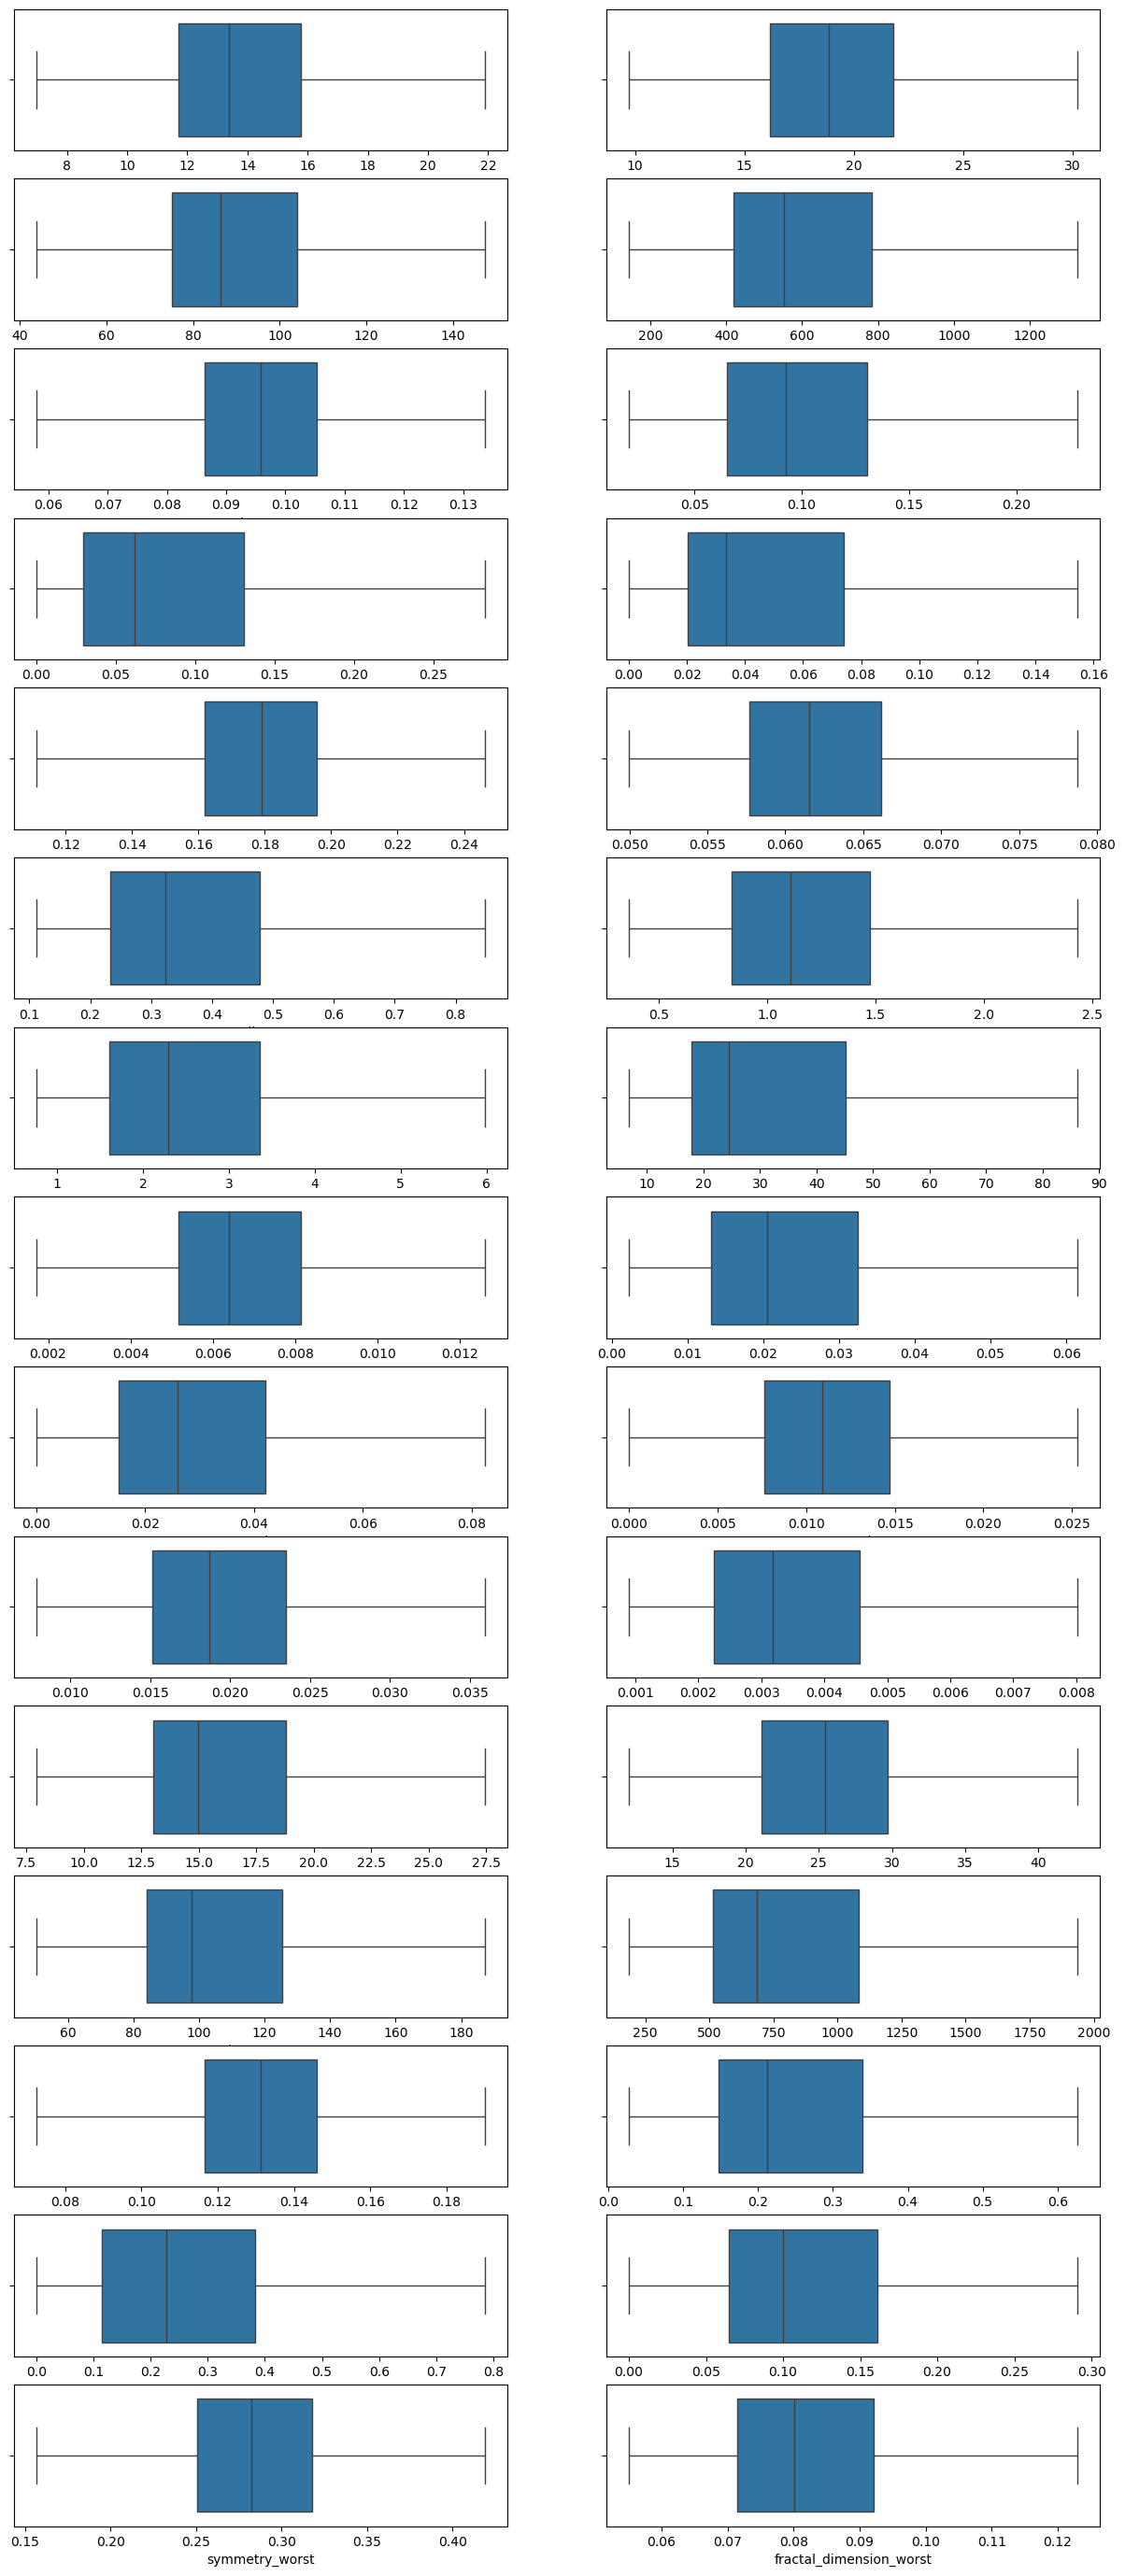

In [18]:
# check for outlaiers
fig, axes = plt.subplots(nrows=15, ncols=2, figsize=(15, 35))  
    
for i, col in enumerate(x.columns):
    ax = axes[i // 2, i % 2]  
    sns.boxplot(data=x.iloc[:,:], x=col, ax=ax)

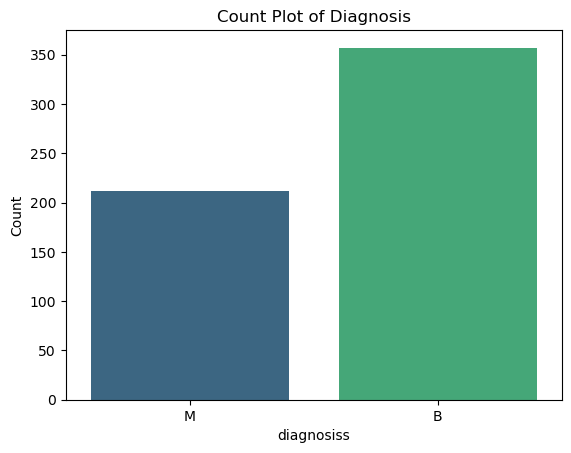

In [19]:
sns.countplot(x='diagnosis', data=df, palette='viridis')  # Replace 'Category' with your column name
plt.title('Count Plot of Diagnosis')
plt.xlabel('diagnosiss')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='diagnosis'>

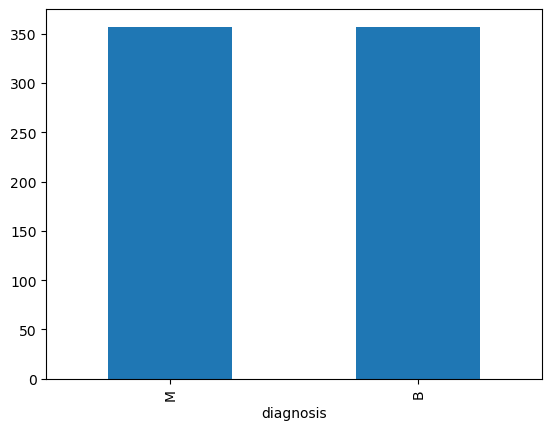

In [20]:
# Resampling Data
from imblearn.over_sampling import SMOTE 

oversampler = SMOTE(random_state=42) # RandomOversampling  
x, y = oversampler.fit_resample(x, y)
y.value_counts().plot(kind='bar')

In [21]:
# spliting data to train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(499, 30)
(499,)
(215, 30)
(215,)


In [22]:
# Scalling Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
from joblib import dump

dump (scaler,'scaler.joblib')

['scaler.joblib']

In [24]:
# Enoding
y_train = y_train.map({"M":1,"B":0})
y_test = y_test.map({"M":1,"B":0})


### Models

#### 1- Logestic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()

In [26]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'l1_ratio': [0.1, 0.5, 0.9]  # Only relevant if 'penalty' is 'elasticnet'
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    verbose=1,
    n_jobs=-1
)

In [27]:
# Perform the grid search
grid_search.fit(x_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Best hyperparameters: {'C': 0.1, 'l1_ratio': 0.9, 'penalty': 'elasticnet', 'solver': 'saga'}


In [28]:
# Evaluate the model with the best parameters
log_reg_model = grid_search.best_estimator_
train_pred = log_reg_model.predict(x_train)
test_pred = log_reg_model.predict(x_test)

print ("For training data:")
print (f"accuracy = {accuracy_score(y_train,train_pred)}")
print ("\n")

print ("For testing data:")
print (f"accuracy = {accuracy_score(y_test,test_pred)}")

For training data:
accuracy = 0.9759519038076152


For testing data:
accuracy = 0.9720930232558139


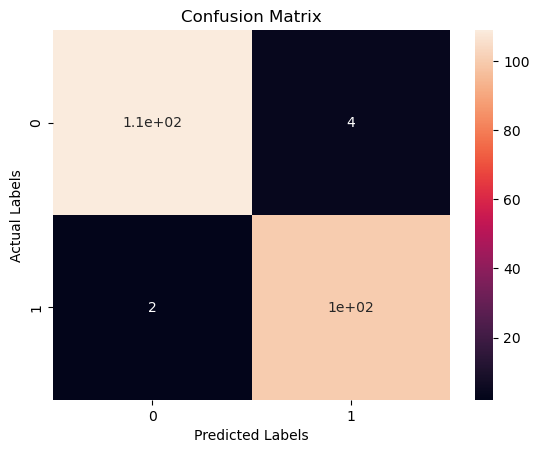

In [29]:
cm = confusion_matrix(y_test,test_pred)

sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [30]:
print (classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       113
           1       0.96      0.98      0.97       102

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215



#### 2- Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier(random_state=42)

In [32]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=dtree_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    verbose=1,
    n_jobs=-1
)

In [33]:
# Perform the grid search
grid_search.fit(x_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits
Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}


In [34]:
# Model Evaluation

# Evaluate the model with the best parameters
dtree_model = grid_search.best_estimator_
train_pred = dtree_model.predict(x_train)
test_pred = dtree_model.predict(x_test)

print ("For training data:")
print (f"accuracy = {accuracy_score(y_train,train_pred)}")
print ("\n")

print ("For testing data:")
print (f"accuracy = {accuracy_score(y_test,test_pred)}")

For training data:
accuracy = 0.9919839679358717


For testing data:
accuracy = 0.9209302325581395


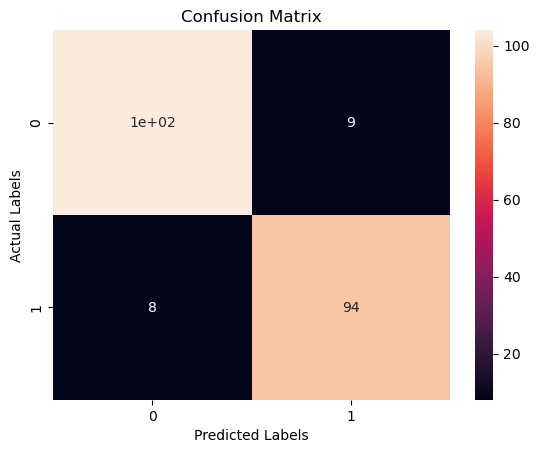

In [35]:
cm = confusion_matrix(y_test,test_pred)

sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [36]:
print (classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       113
           1       0.91      0.92      0.92       102

    accuracy                           0.92       215
   macro avg       0.92      0.92      0.92       215
weighted avg       0.92      0.92      0.92       215



#### 3- Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(random_state=42)

In [38]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rfc_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    verbose=1,
    n_jobs=-1
)


In [39]:
# Perform the grid search
grid_search.fit(x_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Fitting 10 folds for each of 864 candidates, totalling 8640 fits
Best hyperparameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [40]:
# Model Evaluation
# Evaluate the model with the best parameters
rfc_model = grid_search.best_estimator_

train_pred = rfc_model.predict(x_train)
test_pred = rfc_model.predict(x_test)

print ("For training data:")
print (f"accuracy = {accuracy_score(y_train,train_pred)}")
print ("\n")

print ("For testing data:")
print (f"accuracy = {accuracy_score(y_test,test_pred)}")

For training data:
accuracy = 1.0


For testing data:
accuracy = 0.9767441860465116


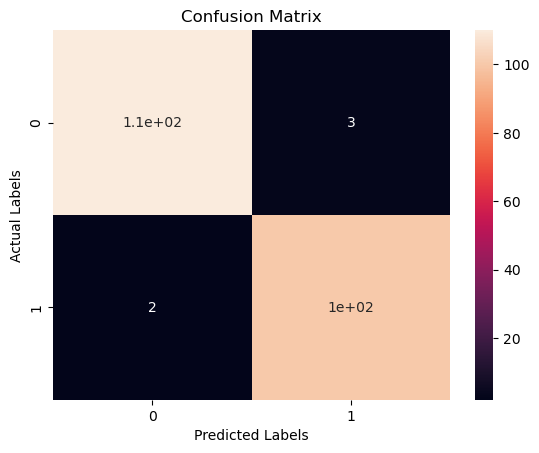

In [41]:
cm = confusion_matrix(y_test,test_pred)

sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [42]:
print (classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       113
           1       0.97      0.98      0.98       102

    accuracy                           0.98       215
   macro avg       0.98      0.98      0.98       215
weighted avg       0.98      0.98      0.98       215



#### 4- K Neighbors Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

In [44]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [45]:
# Perform the grid search
grid_search.fit(x_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}


In [ ]:
# Model Evaluation
# Evaluate the model with the best parameters
knn_model = grid_search.best_estimator_

train_pred = knn_model.predict(x_train)
test_pred = knn_model.predict(x_test)

print ("For training data:")
print (f"accuracy = {accuracy_score(y_train,train_pred)}")
print ("\n")

print ("For testing data:")
print (f"accuracy = {accuracy_score(y_test,test_pred)}")

For training data:
accuracy = 1.0


For testing data:
accuracy = 0.9674418604651163


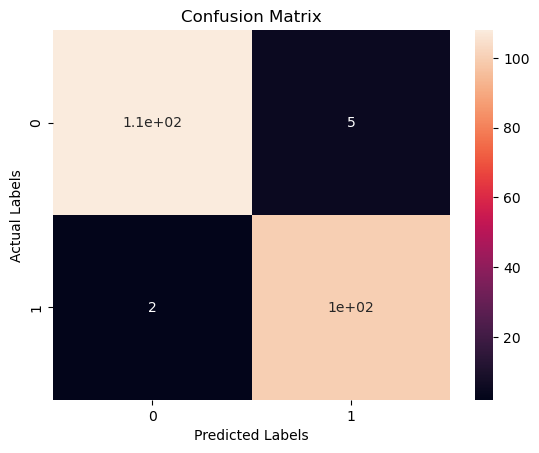

In [47]:
cm = confusion_matrix(y_test,test_pred)

sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [48]:
print (classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       113
           1       0.95      0.98      0.97       102

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215



#### 5- Support Vector Machine

In [50]:
from sklearn.svm import SVC

svc_model = SVC ()

In [51]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],  # Only relevant for 'poly' kernel
    'coef0': [0.0, 0.1, 0.5]  # Only relevant for 'poly' and 'sigmoid' kernels
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=svc_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    verbose=1,
    n_jobs=-1
)

In [52]:
# Perform the grid search
grid_search.fit(x_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
Best hyperparameters: {'C': 10, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [53]:
# Model Evaluation
# Evaluate the model with the best parameters
svc_model = grid_search.best_estimator_

train_pred = svc_model.predict(x_train)
test_pred = svc_model.predict(x_test)

print ("For training data:")
print (f"accuracy = {accuracy_score(y_train,train_pred)}")
print ("\n")

print ("For testing data:")
print (f"accuracy = {accuracy_score(y_test,test_pred)}")

For training data:
accuracy = 0.9939879759519038


For testing data:
accuracy = 0.9767441860465116


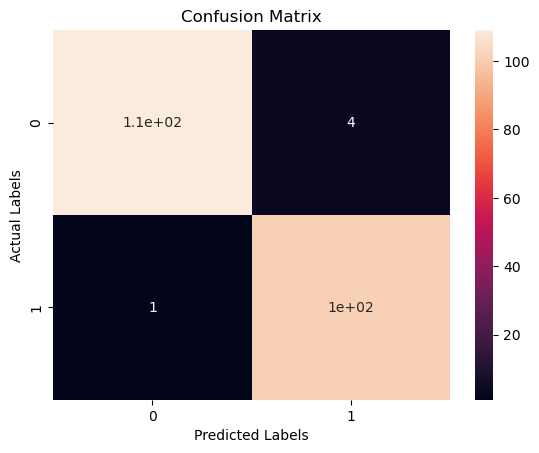

In [54]:
cm = confusion_matrix(y_test,test_pred)

sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [55]:
print (classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       113
           1       0.96      0.99      0.98       102

    accuracy                           0.98       215
   macro avg       0.98      0.98      0.98       215
weighted avg       0.98      0.98      0.98       215



In [62]:
# save model
dump(svc_model, 'svc_model.pkl')

['svc_model.pkl']

#### 6- Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()

In [57]:
# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=gnb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [58]:
# Perform the grid search
grid_search.fit(x_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyperparameters: {'var_smoothing': 1e-09}


In [59]:
# Model Evaluation
# Evaluate the model with the best parameters
gnb_model = grid_search.best_estimator_

train_pred = gnb_model.predict(x_train)
test_pred = gnb_model.predict(x_test)

print ("For training data:")
print (f"accuracy = {accuracy_score(y_train,train_pred)}")
print ("\n")

print ("For testing data:")
print (f"accuracy = {accuracy_score(y_test,test_pred)}")

For training data:
accuracy = 0.9318637274549099


For testing data:
accuracy = 0.9441860465116279


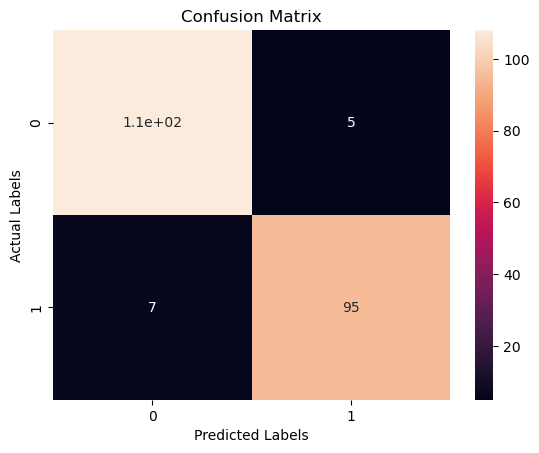

In [60]:
cm = confusion_matrix(y_test,test_pred)

sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [61]:
print (classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       113
           1       0.95      0.93      0.94       102

    accuracy                           0.94       215
   macro avg       0.94      0.94      0.94       215
weighted avg       0.94      0.94      0.94       215



#### Conclusion

__I conclude the accuracy of different model depend on recall matrix__

* Logistic Regression for 0 -> 96% and for 1 -> 98%
* Decision Tree Classifier for 0 -> 92% and for 1 -> 92%
* Random Forest Classifier for 0 -> 97% and for 1 -> 98%
* K Neighbors Classifier for 0 -> 96% and for 1 -> 98%
* Suppoer vector Machine for 0 -> 96% and for 1 -> 99%
* GaussianNB for 0 -> 96% and for 1 -> 93%